# Simple classification example


In this example, we consider the dataset introduced by Agrawal et al. The dataset has 25,000 samples and drift occurs between samples 12,500 and 13,500. We compare Random Forest classifier from Scikit-learn and Adaptive Random Forest classifier from River.


In [1]:
import pandas as pd
import numpy as np
from sail.transformers.river.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from sail.models.river.forest import AdaptiveRandomForestClassifier

##### Download Path


In [2]:
csv_file = "https://raw.githubusercontent.com/AlexImb/automl-streams/master/demos/_datasets/agrawal_gen.csv"

In [3]:
df = pd.read_csv(csv_file,
    names=["salary", "commission", "age", "education level", "make of car", "zipcode", "house value", "years house owned", "loan", "y"]
)
df.head()

,salary,commission,age,education level,make of car,zipcode,house value,years house owned,loan,y
0,68757.426754,58022.846494,21.0,4.0,5.0,7.0,221792.307247,10.0,27402.870141,0
1,126298.059683,0.000000,60.0,0.0,19.0,5.0,248027.000114,6.0,197321.294347,0
2,20642.840226,65253.012270,30.0,2.0,5.0,2.0,591488.097260,17.0,36810.494158,0
3,74382.160911,67141.427442,60.0,4.0,2.0,8.0,123653.321624,4.0,354680.807306,0
4,44492.145159,83925.141993,33.0,0.0,2.0,7.0,204227.660125,11.0,360978.690701,0


In [4]:
df.describe()

,salary,commission,age,education level,make of car,zipcode,house value,years house owned,loan,y
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000
mean,84972.795032,20264.628004,49.734840,1.980320,9.528520,3.988480,5.031361e+05,15.546240,252406.744346,0.402520
std,37597.219134,27474.706289,17.559453,1.412888,5.764321,2.600611,3.075721e+05,8.606724,144648.181065,0.490415
min,20008.016424,0.000000,20.000000,0.000000,0.000000,0.000000,5.020484e+04,1.000000,31.627375,0.000000
25%,52305.865382,0.000000,35.000000,1.000000,4.000000,2.000000,2.559315e+05,8.000000,127555.674975,0.000000
50%,84918.344035,0.000000,49.000000,2.000000,10.000000,4.000000,4.567160e+05,16.000000,252597.079320,0.000000
75%,117495.813013,41081.562259,65.000000,3.000000,14.000000,6.000000,7.095024e+05,23.000000,378789.775283,1.000000
max,149992.810065,84995.082709,80.000000,4.000000,19.000000,8.000000,1.349538e+06,30.000000,499904.721197,1.000000


In [5]:
df = pd.read_csv(csv_file,
    names=["x0", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "y"]
)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,y
0,68757.426754,58022.846494,21.0,4.0,5.0,7.0,221792.307247,10.0,27402.870141,0
1,126298.059683,0.000000,60.0,0.0,19.0,5.0,248027.000114,6.0,197321.294347,0
2,20642.840226,65253.012270,30.0,2.0,5.0,2.0,591488.097260,17.0,36810.494158,0
3,74382.160911,67141.427442,60.0,4.0,2.0,8.0,123653.321624,4.0,354680.807306,0
4,44492.145159,83925.141993,33.0,0.0,2.0,7.0,204227.660125,11.0,360978.690701,0


In [6]:
df.shape

(25000, 10)

## Data exploration


In [7]:
print(len(df.y))
df['y'].value_counts()

25000


y
0    14937
1    10063
Name: count, dtype: int64

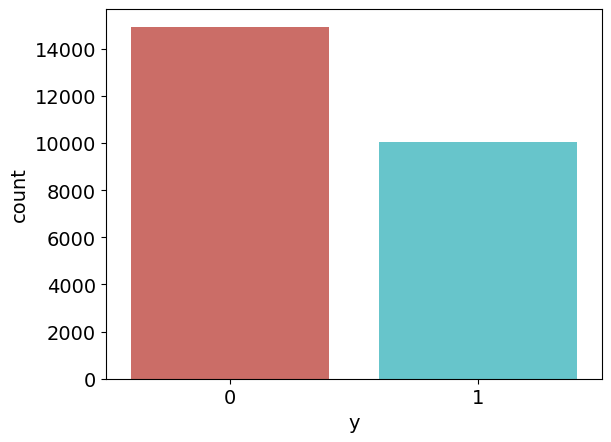

In [8]:
plt.rc("font", size=14)
sns.countplot(x='y',data=df, palette='hls')
plt.show()


In [9]:
df['y'].values.shape

(25000,)

In [10]:
scaler = StandardScaler()
X = df.copy()
X.drop("y", axis=1, inplace=True)
X[X.columns] = scaler.fit_transform(X)
X

,x0,x1,x2,x3,x4,x5,x6,x7,x8
0,-0.431300,1.374318,-1.636464,1.429498,-0.785628,1.158028,-0.914743,-0.644421,-1.555556
1,1.099179,-0.737589,0.584606,-1.401639,1.643154,0.388963,-0.829445,-1.109183,-0.380831
2,-1.711064,1.637480,-1.123909,0.013929,-0.785628,-0.764636,0.287262,0.168913,-1.490517
3,-0.281692,1.706214,0.584606,1.429498,-1.306081,1.542561,-1.233826,-1.341564,0.707068
4,-1.076714,2.317105,-0.953058,-1.401639,-1.306081,1.158028,-0.971851,-0.528230,0.750608
...,...,...,...,...,...,...,...,...,...
24995,0.423851,-0.737589,0.242903,-0.693855,0.428763,-1.533701,2.318492,-1.225373,-1.398224
24996,-1.639362,0.573827,-0.668305,-0.693855,-1.306081,-1.533701,1.816275,0.866056,-0.776598
24997,0.571919,-0.737589,-1.123909,-0.693855,-1.132597,-1.149168,1.672108,1.330819,1.664225
24998,0.703634,-0.737589,0.584606,0.013929,0.775732,1.542561,-1.424730,-0.179658,-1.073691


In [11]:
# Cleaning and preprocessing
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df.copy()
y = X['y'].values
X.drop("y", axis=1, inplace=True)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = y.reshape(len(y),1)
print(X.shape, y.shape)

(25000, 9) (25000, 1)


## Batch learning


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0, shuffle=False)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0, shuffle=False)
rfc = AdaptiveRandomForestClassifier()
rfc.fit(X_train.to_numpy(), y_train.ravel())
X_test = X_test.iloc[0:6000]
y_test = y_test[0:6000]
print(X_train.shape, X_test.shape)

(10000, 9) (6000, 9)


In [14]:
# Predict the test set
from river import metrics
from river import stream
metric = metrics.Accuracy() # Use accuracy as the metric
i = 0   
t = [] 
m = []  

for xi, yi in stream.iter_array(X_test.to_numpy(), y_test, feature_names=["x0", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8"]):
    xi = np.fromiter(xi.values(), dtype=float)
    y_pred= rfc.predict(xi.reshape(1,-1))  
    metric.update(yi[0], y_pred[0]) 
    t.append(i)
    m.append(metric.get()*100)
    i = i+1
    print("Accuracy: ", metric.get())

Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy: 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.36, random_state=0, shuffle=False)
X_train = X_train.to_numpy()
metric_rfc = metrics.Accuracy() 
model_rfc = AdaptiveRandomForestClassifier()
t_inc = [] 
m_inc = [] 

for index, (xi, yi) in enumerate(zip(X_train, y_train)):
    xi = xi.reshape((1,-1))
    if index != 0:
        y_pred_inc= model_rfc.predict(xi)  
        metric_rfc.update(yi[0], y_pred_inc[0])
        m_inc.append(metric_rfc.get()*100)
        if index%500==0:
            print(f"Accuracy (Epoch {index}): {metric_rfc.get()}")
    model_rfc.partial_fit(xi, yi, classes=list(np.unique(y_train))) 
     
    t_inc.append(index)
    

Accuracy (Epoch 500): 0.788
Accuracy (Epoch 1000): 0.835
Accuracy (Epoch 1500): 0.8726666666666667
Accuracy (Epoch 2000): 0.8955
Accuracy (Epoch 2500): 0.9052
Accuracy (Epoch 3000): 0.9086666666666666
Accuracy (Epoch 3500): 0.9154285714285715
Accuracy (Epoch 4000): 0.92225
Accuracy (Epoch 4500): 0.9204444444444444
Accuracy (Epoch 5000): 0.9198
Accuracy (Epoch 5500): 0.9210909090909091
Accuracy (Epoch 6000): 0.9243333333333333
Accuracy (Epoch 6500): 0.928923076923077
Accuracy (Epoch 7000): 0.9324285714285714
Accuracy (Epoch 7500): 0.9361333333333334
Accuracy (Epoch 8000): 0.93775
Accuracy (Epoch 8500): 0.9385882352941176
Accuracy (Epoch 9000): 0.9395555555555556
Accuracy (Epoch 9500): 0.9402105263157895
Accuracy (Epoch 10000): 0.9419
Accuracy (Epoch 10500): 0.9434285714285714
Accuracy (Epoch 11000): 0.9447272727272727
Accuracy (Epoch 11500): 0.946
Accuracy (Epoch 12000): 0.948
Accuracy (Epoch 12500): 0.94984
Accuracy (Epoch 13000): 0.9331538461538461
Accuracy (Epoch 13500): 0.9236296296

In [20]:
from river import drift
drift_detector = drift.ADWIN()
drifts = []
for i, val in enumerate(y_train):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)
        drift_detector._reset()   # As a best practice, we reset the detector
print(drifts)


Change detected at index 13311
[13311]
